# En enkel drivhusmodell
Seminar 3 i FYS1035, høsten 2022. Anja Røyne, UiO

**Start med å kjøre cella under for å importere pakkene vi trenger.**

In [ ]:
from numpy import *
from pylab import *

Nå skal vi ta med jordas atmosfære. Vi skal bruke noe som likner på modellen fra video nummer 2, men som vi husker, gav den alt for høy temperatur. For å gjøre modellen mer realistisk skal vi ta hensyn til at ikke all utstrålingen blir fanget opp av atmosfæren. Det kan vi gjøre ved å innføre en emissivitet $\epsilon$ for atmosfæren, slik at utstrålingen fra atmosfæren blir 

$Q_{ut,a} = \sigma \epsilon T_a^4$

I tillegg skal vi, for enkelhets skyld, anta at en andel $1-\epsilon$ av varmestrålingen fra jorda passerer  gjennom atmosfæren og rett ut i verdensrommet. Varmen som absorberes av atmosfæren blir da

$Q_{inn,a} = \epsilon Q_{ut,j}$

Til slutt kan vi ta med at jorda har en albedo $a$, slik at $Q_{inn} = (1-a)S$. 

Energibalanse for atmosfæren:

$T_a^4 = \frac{1}{2}T_j^4$

Energibalanse for bakken:

$(1-a)S+\epsilon\sigma T_a^4 = \sigma T_j^4$

Setter inn for atmosfæretemperaturen:

$(1-a)S+\frac{1}{2}\epsilon\sigma T_j^4 = \sigma T_j^4$

$(1-\frac{1}{2}\epsilon)T_j^4 = \frac{(1-a)S}{\sigma}$

$T_j = \left(\frac{(1-a)S}{\sigma(1-1/2\epsilon)}\right)^{\frac{1}{4}}$

Som et utgangspunkt kan vi sette $a = 0.3$. 

**Hva må $\epsilon$ være for at vi skal få en realistisk overflatetemperatur (nær 15$^{\circ}$C)?** Det kan vi finne ut ved å plotte $T_j$ som funksjon av $\epsilon$:


Text(0, 0.5, 'likevektstemperatur (grader celcius)')

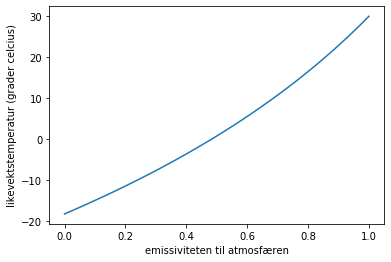

In [7]:
# fysiske verdier:
S = 342 # W/m2, innstråling
sigma = 5.67e-8 # J/m2K, Stefan-Boltzmann-konstanten
a = 0.3 # albedo
# liste over verdier for epsilon:
n = 90 # antall verdier
epsilon = linspace(0,1,n) # gir listen med (startverdi, stoppverdi, antall)

# regner ut likevektstemperaturene
Tj = # SETT INN RIKTIG LIKNING
# gjør om til celcius
Tj_c = Tj - 273.15

# plotter resultatene
plot(epsilon,Tj_c)
xlabel("emissiviteten til atmosfæren")
ylabel("likevektstemperatur (grader celcius)")



**Jordas gjennomsnittstemperatur er omtrent 15$^o$C. Hva er en rimelig verdi for emissiviteten?**

Nå kan vi lage en modell for hvordan jorda med drivhuseffekt vil utvikle seg over tid. Vi kan anta at varmekapasiteten til atmosfæren er $c_a=1.02\cdot10^7$ J/m$^2$K ([tatt herfra](https://atmos.washington.edu/~dennis/321/321_Lecture_12.pdf)). Da blir modellen slik:

Etter 25.00 år er temperaturen blitt -11.42 grader celcius.


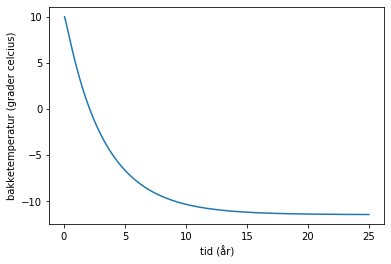

In [16]:
# fysiske verdier:
S = 342 # W/m2, innstråling
sigma = 5.67e-8 # J/m2K, Stefan-Boltzmann-konstanten
epsilon = # SETT INN VERDI
a = 0.3 # albedo
c_j = 4.0e8 # J/m2K, varmekapasitet for jorda
c_a = 1.02e7 # J/m2K, varmekapasitet for atmosfæren
T0j_c = 10 #grader celcius, starttemperatur for jordoverflaten
T0a_c = 2 #grader celcius, starttemperatur for atmosfæren

# regner om starttemperaturene til kelvin:
T0j = T0j_c + 273.15
T0a = T0a_c + 273.15
# numeriske verdier:
N = 500 # antall tidssteg
dt = 0.05*365*24*3600 # antall sekunder per tidssteg (antall år * dager pr år * timer pr dag * sekunder pr time)

# lager en liste over alle tidspunktene: 
t = arange(1,N+1,1) 
# lager en tom liste der jeg skal lagre temperaturene for hvert år:
Tj = zeros(N)
Ta = zeros(N)

# tidsløkka:
for i in t: # dette skal gjøres for hver verdi av "t" etter tur, til lista er tom
    # alt som hører inne i løkka skal være flyttet ett hakk inn til høyre.
    if i == 1: # to likhetstegn brukes for å sjekke om i er akkurat lik 1
        Tj[i-1] = T0j 
        Ta[i-1] = T0a 
        # Python teller plassene i lister fra 0. Her sier jeg at i år 1 skal jeg legge startverdien på plass 0 i temperatur-lista
    else: # hvis vi ikke er i første år
        # atmosfærens utstråling
        Q_ut_a = # SETT INN RIKTIG LIKNING
        # innstråling på jorda
        Q_inn_j = # SETT INN RIKTIG LIKNING
        # utstråling fra jorda
        Q_ut_j = # SETT INN RIKTIG LIKNING
        # temperatur, jorda
        Tj[i-1] = Tj[i-2]+ 1/c_j*(Q_inn_j-Q_ut_j)*dt # oppdaterer temperaturen basert på energibalansen
        # temperatur, atmosfæren
        Q_inn_a = # SETT INN RIKTIG LIKNING
        Ta[i-1] = Ta[i-2]+ 1/c_a*(Q_inn_a-Q_ut_a)*dt # oppdaterer temperaturen basert på energibalansen
                
# tilbake til celcius
Tj_c = Tj-273.15
        
# plotte resultatet:
plot(t*dt/(365*24*3600),Tj_c)
xlabel("tid (år)")
ylabel("bakketemperatur (grader celcius)")

# hva blir sluttresultatet
print("Etter",format(t[-1]*dt/(365*24*3600),".2f"),"år er temperaturen blitt",format(Tj_c[-1],".2f"),"grader celcius.") 

**I modellen over: hvilken parameter gir det mest mening å endre på dersom du vil se på effekten av en kraftigere drivhuseffekt? Prøv og se hva utslaget blir. Var det som forventet?**